In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#Given local path, find full path
def PathFinder(path):
    script_dir = os.path.dirname('__file__')
    fullpath = os.path.join(script_dir,path)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return np.loadtxt(fullpath,delimiter=',')

In [3]:
AdagradOptimizer=ReadData('../DATA/VIZ/HVAC_optimizer/AdagradOptimizer.txt')
AdadeltaOptimizer=ReadData('../DATA/VIZ/HVAC_optimizer/AdadeltaOptimizer.txt')
AdamOptimizer=ReadData('../DATA/VIZ/HVAC_optimizer/AdamOptimizer.txt')
GradDescent=ReadData('../DATA/VIZ/HVAC_optimizer/GradDescent.txt')
RMSProp=ReadData('../DATA/VIZ/HVAC_optimizer/RMSProp.txt')

In [4]:
data = np.stack((GradDescent[:,1], AdagradOptimizer[:,1],AdadeltaOptimizer[:,1],AdamOptimizer[:,1],RMSProp[:,1]),axis=-1)

In [5]:
data

array([[-665508.75 , -665809.5  , -665953.06 , -665771.25 , -665898.75 ],
       [-718112.75 , -665740.94 , -665952.94 , -665702.69 , -663720.25 ],
       [-874809.25 , -665692.44 , -665952.94 , -665634.   , -662124.56 ],
       ..., 
       [-874809.25 , -657055.06 , -665657.75 , -117183.53 ,  -25419.836],
       [-718683.75 , -657053.94 , -665657.69 , -117076.38 ,  -25432.42 ],
       [-874809.25 , -657052.81 , -665657.62 , -116969.38 ,  -25411.43 ]])

In [6]:
df = pd.DataFrame(data, columns=['SGD','Adagrad','Adadelta','Adam','RMSProp'])

In [7]:
df

,SGD,Adagrad,Adadelta,Adam,RMSProp
0,-665508.75,-665809.50,-665953.06,-665771.25,-665898.750
1,-718112.75,-665740.94,-665952.94,-665702.69,-663720.250
2,-874809.25,-665692.44,-665952.94,-665634.00,-662124.560
3,-718683.75,-665652.75,-665952.88,-665565.38,-660778.810
4,-874809.25,-665618.38,-665952.88,-665496.62,-659576.810
5,-718683.75,-665587.69,-665952.88,-665427.88,-658469.440
6,-874809.25,-665559.62,-665952.81,-665359.19,-657429.060
7,-718683.75,-665533.69,-665952.75,-665290.38,-656438.750
8,-874809.25,-665509.38,-665952.75,-665221.62,-655487.060
9,-718683.75,-665486.50,-665952.75,-665152.81,-654565.690


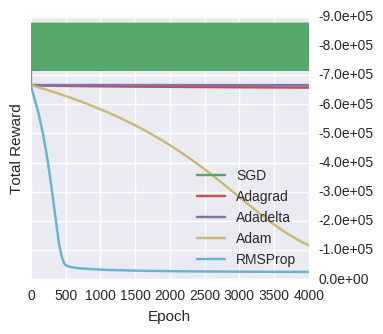

In [8]:
current_palette = sns.color_palette()
ax=df.plot(color=current_palette[1:],figsize=(4,3.5))
ax.yaxis.tick_right()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.ylabel('Total Reward')
plt.xlabel('Epoch')
plt.tight_layout()
plt.legend(fancybox=True,loc='lower right', prop={'size':10})
plt.gca().invert_yaxis()
plt.savefig('../PLOTS/HVAC_Optimizer.eps',format='eps')